In [15]:
# Frameworks loading
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Data loading

df = pd.read_csv('desafio1.csv')

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
# Formato do dataset
df.shape

(7000, 12)

In [9]:
# Filtragem de gêneros homens e mulhers

df_homem = df.loc[(df['genero'] == 'M')]
df_mulher = df.loc[(df['genero'] == 'F')]

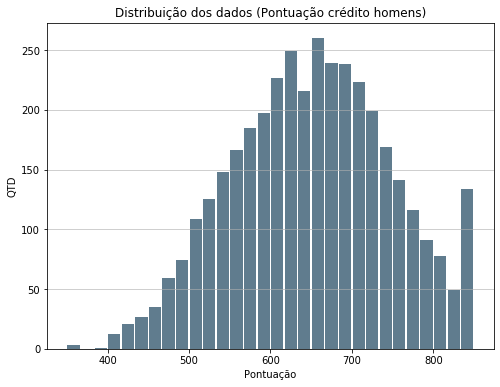

In [33]:
#Distribuição dos dados entre homens referente a pontuação de crédito
df_homem = df.loc[(df['genero'] == 'M')]

# Visualização 
x = df_homem['pontuacao_credito']

plt.figure(figsize=(8,6)) 
plt.hist(x, bins = 30,rwidth=0.9, color='#607c8e')
plt.title('Distribuição dos dados (Pontuação crédito homens)')
plt.xlabel('Pontuação')
plt.ylabel('QTD')
plt.grid(axis='y', alpha=0.75)

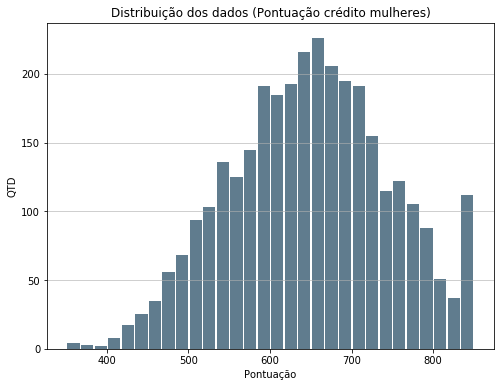

In [32]:
#Distribuição dos dados entre mulheres referente a pontuação de crédito
df_mulher = df.loc[(df['genero'] == 'F')]

# Visualização 
x = df_mulher['pontuacao_credito']

plt.figure(figsize=(8,6)) 
plt.hist(x, bins = 30,rwidth=0.9, color='#607c8e')
plt.title('Distribuição dos dados (Pontuação crédito mulheres)')
plt.xlabel('Pontuação')
plt.ylabel('QTD')
plt.grid(axis='y', alpha=0.75)

In [24]:
# Agrupar os dados por estado, e então, obter a estatística descritiva requerida no desafio: moda, mediana, media e desvio padrão.

df_metrics = df.groupby('estado_residencia').agg(
    moda = pd.NamedAgg(column = 'pontuacao_credito', aggfunc = lambda x: x.mode()),
    mediana = pd.NamedAgg(column = 'pontuacao_credito', aggfunc = 'median'),
    media = pd.NamedAgg(column = 'pontuacao_credito', aggfunc = 'mean'),
    desvio_padrao = pd.NamedAgg(column = 'pontuacao_credito', aggfunc = 'std')).sort_values(by = 'estado_residencia', ascending = False)

df_metrics = df_metrics.T
df_metrics

estado_residencia,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


In [25]:
# Salvando o dataset no formato json
df_metrics.to_json('submissao.json', orient='columns')